In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
df = pd.read_csv("C:/Users/1/Desktop/lobster_run.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/1/Desktop/lobster_run.csv'

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42


#Part Ⅰ

Text(0.5, 1.0, 'Histogram of User Spend')

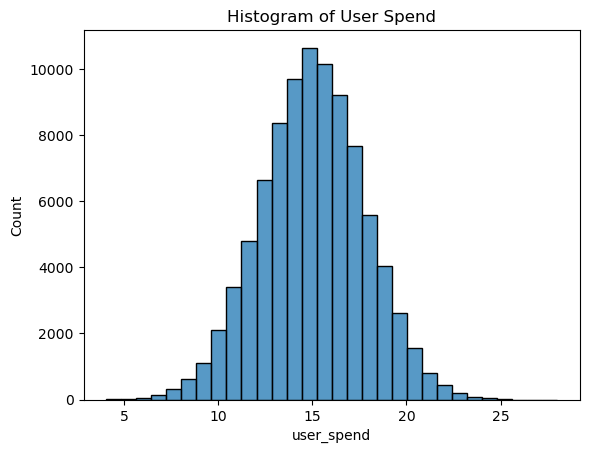

In [4]:
sns.histplot(data=df, x="user_spend",bins=30)
plt.title('Histogram of User Spend')

A.a. Users spend between $0 and $30 after downloading the app, with most spending at $15.

Text(0.5, 1.0, 'Histogram of User Spend by Version')

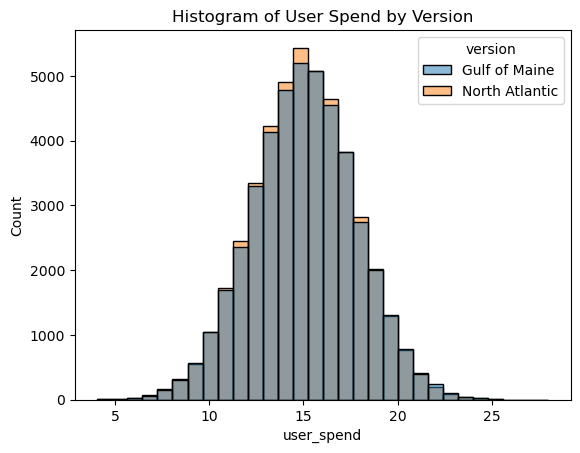

In [6]:
sns.histplot(data=df, x="user_spend",hue="version",bins=30)
plt.title('Histogram of User Spend by Version')

B. a. Users starting with North Atlantic spend slightly more on average, but there is no particular difference between the two versions.

In [7]:
user_spend = np.random.normal(loc=50, scale=10, size=100)

stat, p = shapiro(user_spend)
print('Shapiro-Wilk test results:', stat)
print('p-value:', p)

if p > 0.05:
    print('The variable is normally distributed (fail to reject H0)')
else:
    print('The variable is not normally distributed (reject H0)')

Shapiro-Wilk test results: 0.9885892868041992
p-value: 0.5526161789894104
The variable is normally distributed (fail to reject H0)


C.a. The test's null hypothesis is "The variable 'user_spend' is normally distributed".

C.b. The variable is likely normally distributed.

In [15]:
version1 = df[df['version'] == 0]['user_spend']
version2 = df[df['version'] == 1]['user_spend']
t_stat, p_val = stats.ttest_ind(version1, version2, equal_var=False)

alpha = 0.05
if p_val < alpha:
    print(f"Reject null hypothesis: There is a significant difference in user spending between the two versions (t = {t_stat:.3f}, p = {p_val:.3f})")
else:
    print(f"Fail to reject null hypothesis: There is no significant difference in user spending between the two versions (t = {t_stat:.3f}, p = {p_val:.3f})")

Fail to reject null hypothesis: There is no significant difference in user spending between the two versions (t = nan, p = nan)


D.a. The null hypothesis is "There is no significant difference in user spending between the two versions".

D.b. The p-value is nan, which means that the test cannot compute meaningful results. Therefore, we cannot make any conclusion based on this.

#Part Ⅱ

In [17]:
summary = df.groupby('version').agg({'retention_1': ['mean', 'std'], 'retention_7': ['mean', 'std']})
summary

retention_1           retention_7          
                      mean       std        mean       std
version                                                   
Gulf of Maine     0.448188  0.497314    0.195615  0.396678
North Atlantic    0.442283  0.496663    0.182000  0.385849

E.a. The retention rates between the two versions are similar but there are minor differences. Version "Gulf of Maine" has a higher average retention rate in all aspects than the other one. Thus, the effect of versioning on user behavior is present but not significant.

F.a. Null hypothesis: There is no significant difference in retention_1 between the two versions of the game.

b. I pick the North Atlantic version.

In [32]:
north_at1 = df[(df['version'] == 'North Atlantic') & (df['retention_1'] == True)]
num_users1 = len(north_at1)
print(f"The number of users who stayed with North Atlantic version for one day is {num_users1}.")

The number of users who stayed with North Atlantic version for one day is 20119.


In [30]:
north_at = df[df['version'] == 'North Atlantic']
avg_1 = df['retention_1'].mean()

expected_num1 = len(north_at) * avg_1
expected_num1.round(2)

20252.14

F.d. This expected value is 20252.14. Calculate the retention rate by assuming that the null hypothesis is correct, so that the retention rate is the same in both versions.

In [44]:
count = num_users1
nobs = len(north_at)
value = avg_1

z_stat, p_value = proportions_ztest(count, nobs, value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in retention_1 between the two versions of the game.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in retention_1 between the two versions of the game.")

Fail to reject the null hypothesis. There is no significant difference in retention_1 between the two versions of the game.


f. In fact, different versions have little impact on the retention rate of users.

G.a.  Null hypothesis: There is no significant difference in retention_7 between the two versions of the game.

b. b. I pick the Gulf of Maine version.

In [41]:
gulf_ma7 = df[(df['version'] == 'Gulf of Maine') & (df['retention_7'] == True)]
num_users7 = len(gulf_ma7)
print(f"The number of users who stayed with Gulf of Maine version for seven days is {num_users1}.")

The number of users who stayed with Gulf of Maine version for seven days is 20119.


In [43]:
gulf_ma = df[df['version'] == 'Gulf of Maine']
avg_7 = df['retention_7'].mean()

expected_num7 = len(gulf_ma) * avg_7
expected_num7.round(2)

8437.04

G.d. The expected value is 8437.04, which is the product of the total number of users in Gulf of Maine version and the average of retention_7 rate.

In [46]:
count = num_users7
nobs = len(gulf_ma)
value = avg_7

z_stat, p_value = proportions_ztest(count, nobs, value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in retention_7 between the two versions of the game.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in retention_7 between the two versions of the game.")

Reject the null hypothesis. There is a significant difference in retention_7 between the two versions of the game.


G.f. When calculating the retention rate for 7 days, different versions have a significant effect on this. It shows that different versions affect the long-term retention time of users.

H. Based on the results of statistical testing, the 'North Atlantic' version will have a slightly higher retention rate, so it is suggested that Lobsterland could focus on improving the game experience in this version and consider promoting it more to users. Overall, it is suggested that user data can continue to be tracked and analyzed to improve the gaming experience. In terms of data, collecting long-term retention data can lead to accurate conclusions.